In [1]:
import sys
sys.path.append('../src')
import tensorflow as tf
import tensorflow.keras as k
import pandas as pd
import numpy as np
import test_submit
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def plt_norm(s, n=1):
    mean = s.mean()
    std = s.std()
    s[(s < mean + n*std) & (s > mean - n*std)].plot.hist(bins=60)
    plt.show()

In [3]:
train = pd.read_pickle('../inputs/dataset/train.pkl')

In [4]:
train[['target', 'investment_id', 'time_id']].describe()

,target,investment_id,time_id
count,3.141410e+06,3.141410e+06,3.141410e+06
mean,NaN,1.885265e+03,6.654862e+02
std,0.000000e+00,1.083616e+03,3.560434e+02
min,-9.421875e+00,0.000000e+00,0.000000e+00
25%,-5.004883e-01,9.520000e+02,3.530000e+02
50%,-9.716797e-02,1.882000e+03,7.040000e+02
75%,3.571777e-01,2.830000e+03,9.750000e+02
max,1.203906e+01,3.773000e+03,1.219000e+03


有的项目数据多，有的少

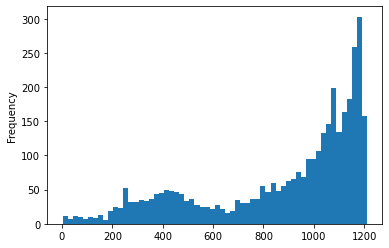

In [6]:
train.groupby('investment_id').time_id.count().plot.hist(bins=60)
plt.show()

均值整体在0

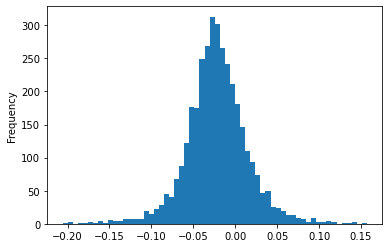

mean -0.0231 std 0.04636


In [8]:
plt.show()
plt_norm(train.groupby('investment_id').target.mean(), 4)
print('mean', train.groupby('investment_id').target.mean().mean(), 'std', train.groupby('investment_id').target.mean().std())

Text(45.0, 0.5, 'mean target')

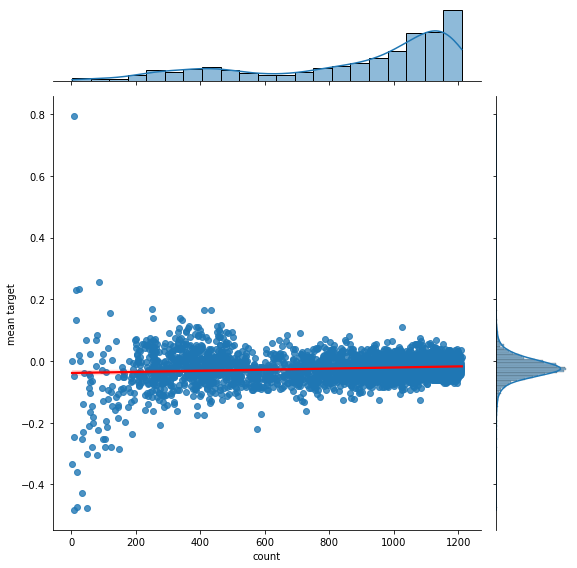

In [11]:
ax = sns.jointplot(x=train.groupby('investment_id').target.count(),
                   y=train.groupby('investment_id').target.mean(),
                   height=8,
                   kind='reg',
                   joint_kws={'line_kws': {'color': 'red'}})
ax.ax_joint.set_xlabel('count')
ax.ax_joint.set_ylabel('mean target')


Text(45.0, 0.5, 'mean target')

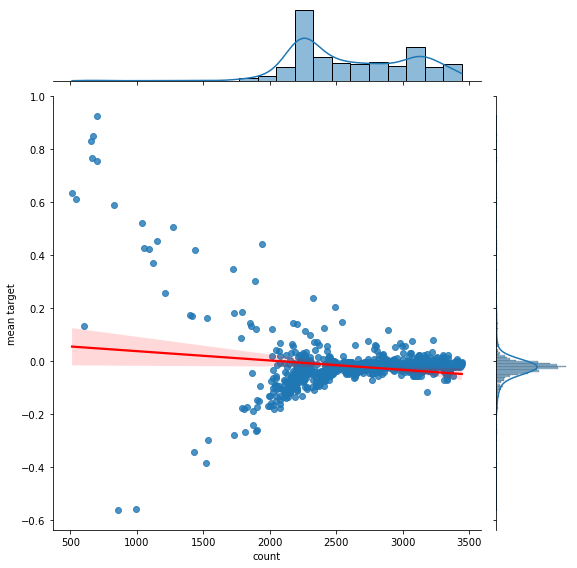

In [16]:
ax = sns.jointplot(x=train.groupby('time_id').target.count(),
                   y=train.groupby('time_id').target.mean(),
                   height=8,
                   kind='reg',
                   joint_kws={'line_kws': {'color': 'red'}})
ax.ax_joint.set_xlabel('count')
ax.ax_joint.set_ylabel('mean target')


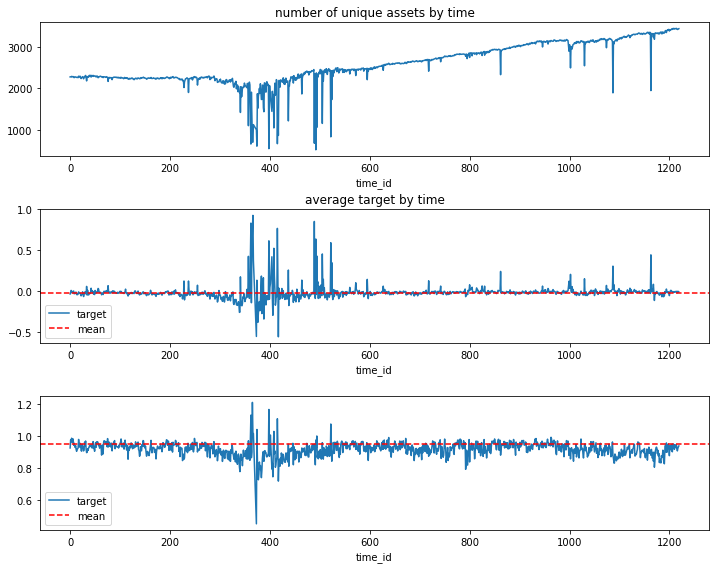

In [25]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
train.groupby('time_id').investment_id.nunique().plot()
plt.title("number of unique assets by time")

plt.subplot(3, 1, 2)
train.groupby('time_id').target.mean().plot()
plt.title("average target by time")
plt.axhline(y=train.groupby('investment_id').target.mean().mean(), color='r', linestyle='--', label='mean')
plt.legend(loc='lower left')

plt.subplot(3, 1, 3)
train.groupby('time_id').target.std().plot()
plt.axhline(y=train.groupby('investment_id').target.std().mean(), color='r', linestyle='--', label='mean')
plt.legend(loc='lower left')

plt.subplots_adjust(right=.9, top=1.3, wspace=.4, hspace=.4)
plt.show()

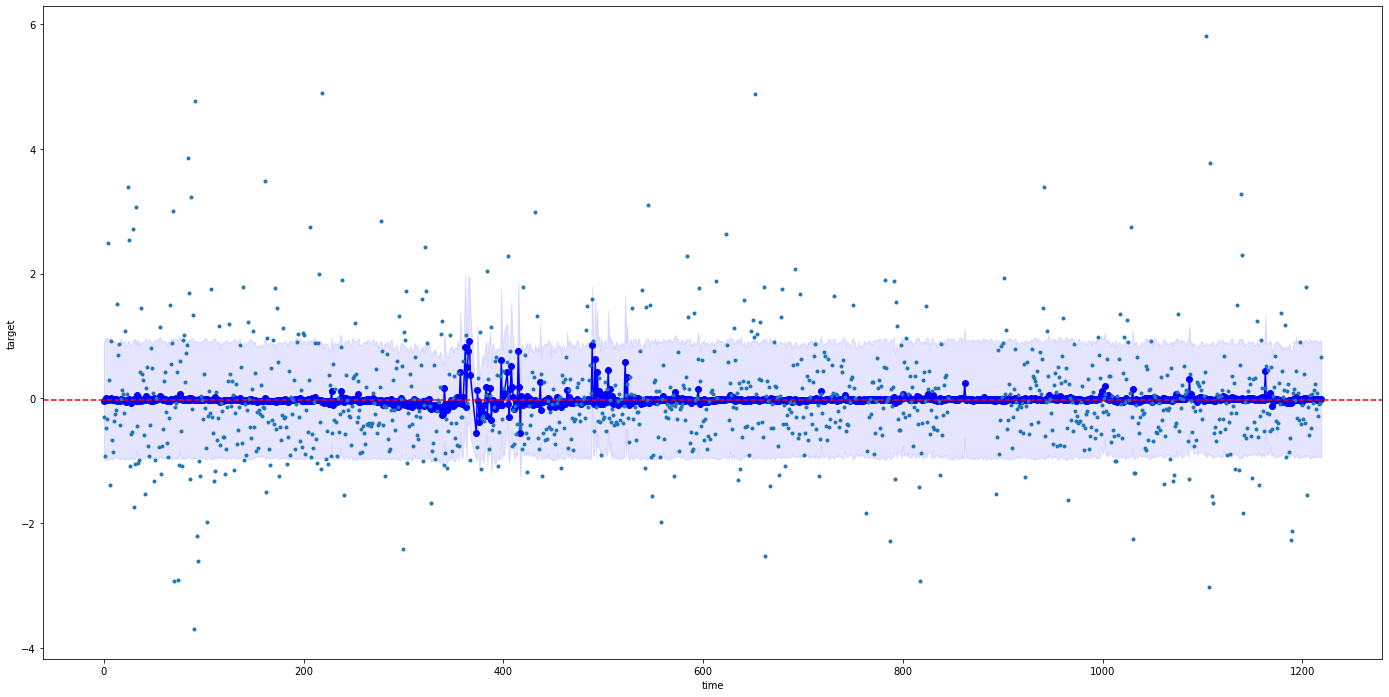

In [32]:
time_group = train.groupby('time_id')
investment_group = train.groupby('investment_id')
mean_target = investment_group.target.mean()
time2target_mean = time_group.target.mean()
time2target_std = time_group.target.std()

_, axes = plt.subplots(1, 1, figsize=(24, 12))
plt.fill_between(
        time2target_mean.index,
        time2target_mean - time2target_std,
        time2target_mean + time2target_std,
        alpha=0.1,
        color="b",
    )
plt.plot(
        time2target_mean.index, time2target_mean, "o-", color="b", label="Training score"
    )
plt.axhline(y=mean_target.mean(), color='r', linestyle='--', label="mean")

asset = 1

plt.plot(train[train.investment_id==asset].time_id,
               train[train.investment_id==asset].target, '.')

axes.set_ylabel("target")
axes.set_xlabel("time")
plt.show()

In [39]:
for i in train.columns:
    if 'f_' not in i: 
        print(i)

investment_id
time_id
target
